 Prepare the general libraries.

In [1]:
# libraries
library(community)
library(ggplot2)

 Prepare the path.

In [2]:
# the path to the counts, cell annotation and sample annation file. In this case its our working dir same as
# the notebook
path_in <- 'computed_results/'

print("path_in")
print(path_in)

[1] "path_in"
[1] "computed_results/"


Load data.

In [3]:
suppressWarnings(load(paste0(path_in,"/interactions.RData")))

Load functions for visualization.

In [4]:
data("visualization_functions")

## Parameters

In [5]:
# threshold for log2FC of the weights
threshold_log2FC <- interactions$thresholds$threshold_log2FC

idx_up <- interactions$anno_interactions$log2FC_weights > threshold_log2FC
idx_unchanged <- abs(interactions$anno_interactions$log2FC_weights)<= threshold_log2FC
idx_down <- interactions$anno_interactions$log2FC_weights < -threshold_log2FC
idx_sign <- !is.na(interactions$anno_interactions$sign) & interactions$anno_interactions$sign
idx_good <- interactions$anno_interactions$passed_QC_filter

In [6]:
# extract cell types
cell_types <- unique(interactions$anno_cells$cell_type)
print(cell_types)

[1] "Mono" "Gran" "T"    "NK"   "B"    "HSPC" "Ery"  "DC"  


### Forest plots

In [7]:
library(gridExtra) 

Warning message:
“package ‘gridExtra’ was built under R version 4.1.3”


In [8]:
ordered_IDs <- order_IDs_by_interaction_categories(interactions)
# print(str(ordered_IDs))
print(length(unlist(ordered_IDs)))

[1] 7326


#### Split by category

In [9]:
component_lim <- find_component_limits(interactions, ordered_IDs)

print(str(component_lim))

List of 14
 $ log2FC_w_min    : num -16.2
 $ log2FC_w_max    : num 15.4
 $ log2FC_rho_s_min: num -1.37
 $ log2FC_rho_s_max: num 2.18
 $ log2FC_phi_s_min: num -6.44
 $ log2FC_phi_s_max: num 5.69
 $ log2FC_p_s_min  : num -4.22
 $ log2FC_p_s_max  : num 1.1
 $ log2FC_rho_r_min: num -1.37
 $ log2FC_rho_r_max: num 2.18
 $ log2FC_phi_r_min: num -6.5
 $ log2FC_phi_r_max: num 5.65
 $ log2FC_p_r_min  : num -2.29
 $ log2FC_p_r_max  : num 1.14
NULL


In [10]:
# load("felix_vis.RData")

In [11]:
# Combine IDs of significantly upregulated and downregulated interactions
significant_interaction_ids <- unique(c(interactions$anno_interactions$interaction_ID[idx_up & idx_sign], 
                                       interactions$anno_interactions$interaction_ID[idx_down & idx_sign]))

In [12]:
length(significant_interaction_ids)

[1] 2664

In [13]:
IDs <- as.character(c(significant_interaction_ids
                     ))

[1] "Cell Type: Mono - Number of interactions: 422"
[1] "Cell Type: Gran - Number of interactions: 389"


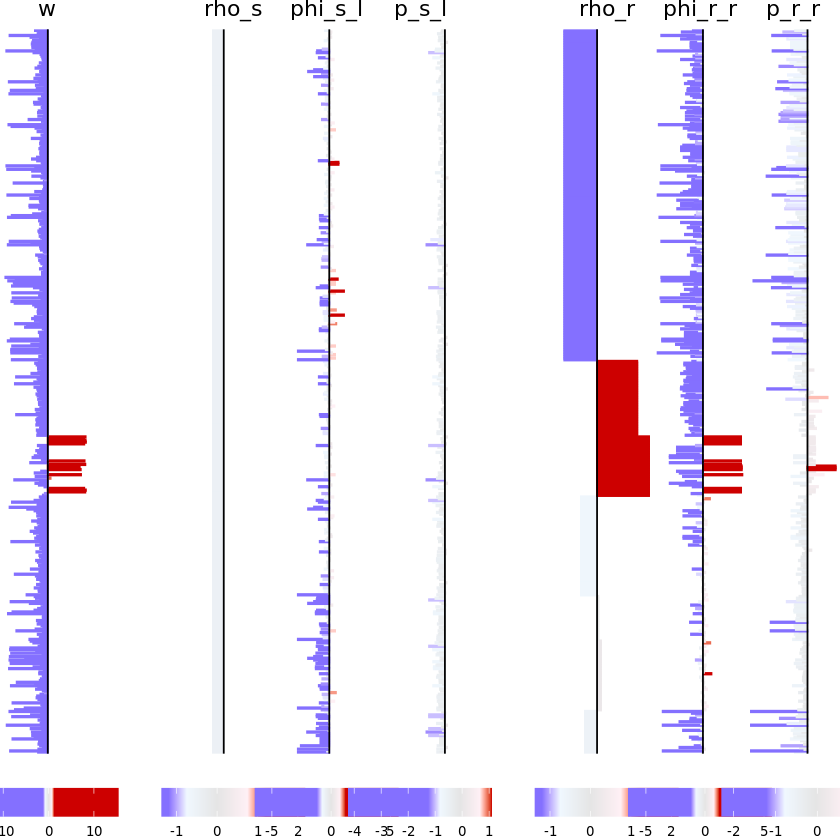

[1] "Cell Type: T - Number of interactions: 191"


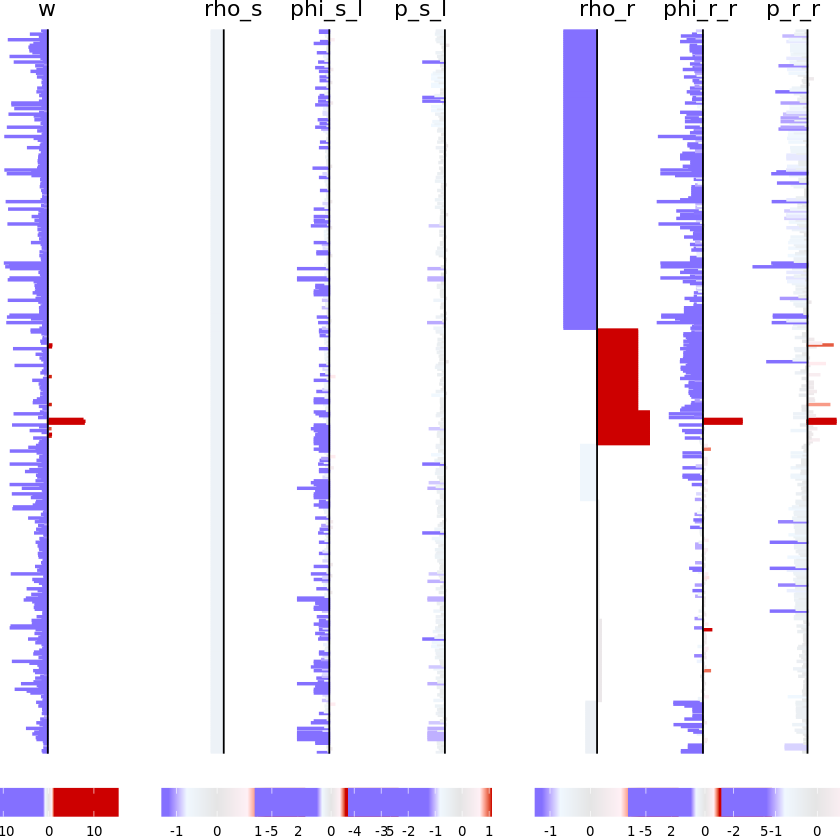

[1] "Cell Type: NK - Number of interactions: 213"


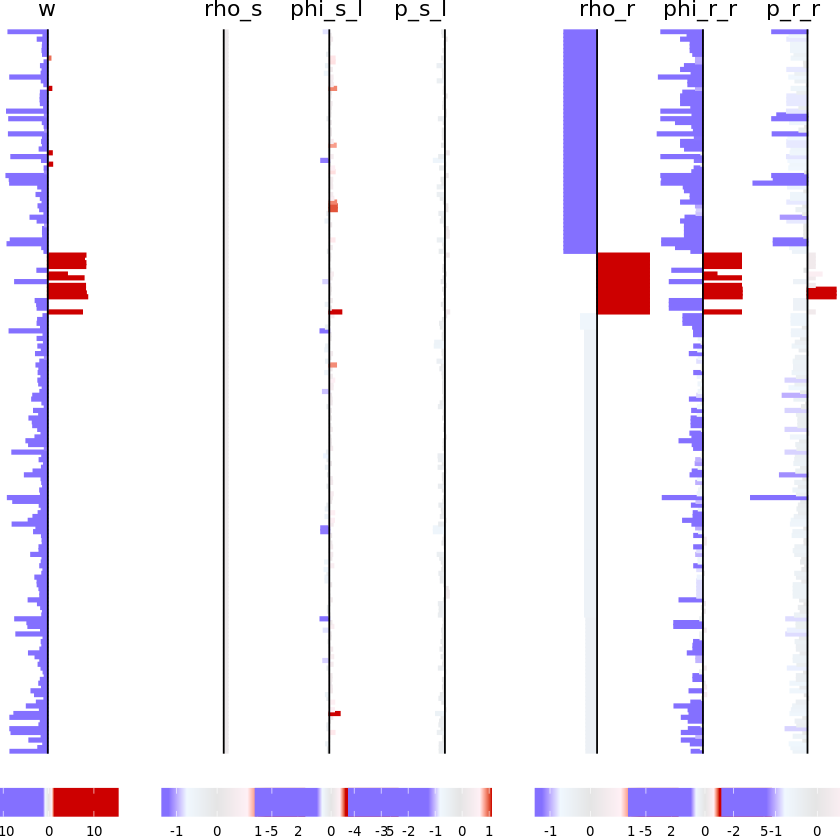

[1] "Cell Type: B - Number of interactions: 246"


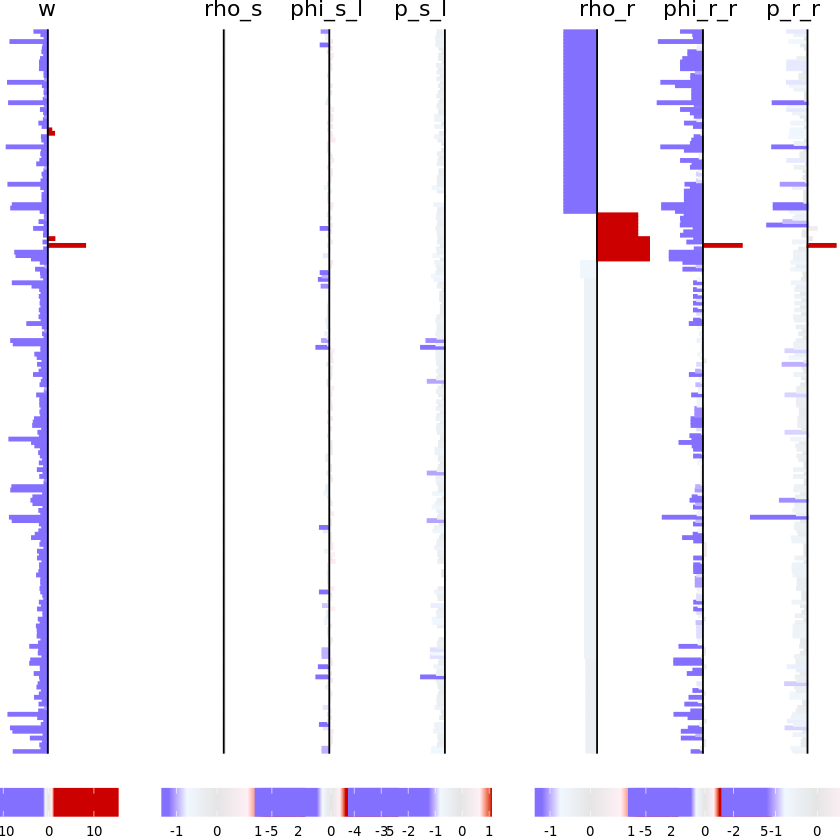

[1] "Cell Type: HSPC - Number of interactions: 113"


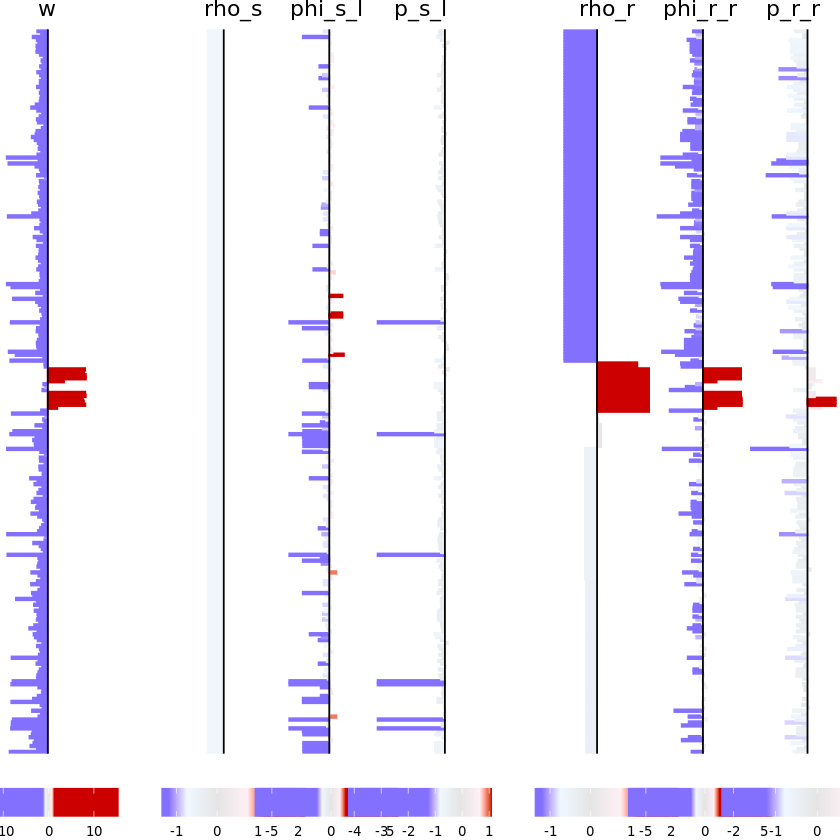

[1] "Cell Type: Ery - Number of interactions: 269"


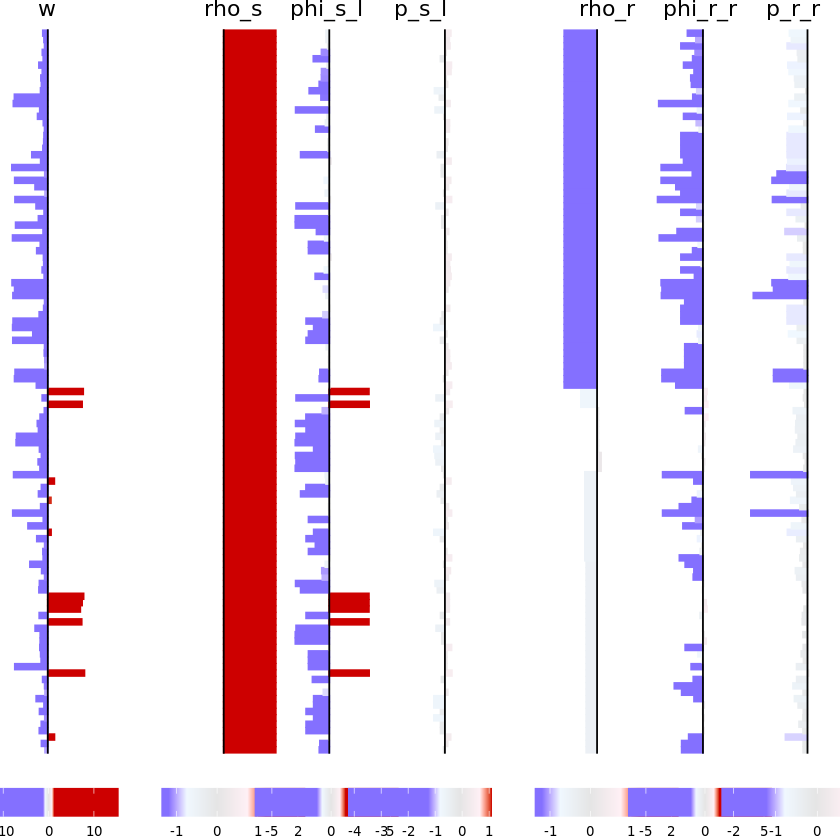

[1] "Cell Type: DC - Number of interactions: 615"


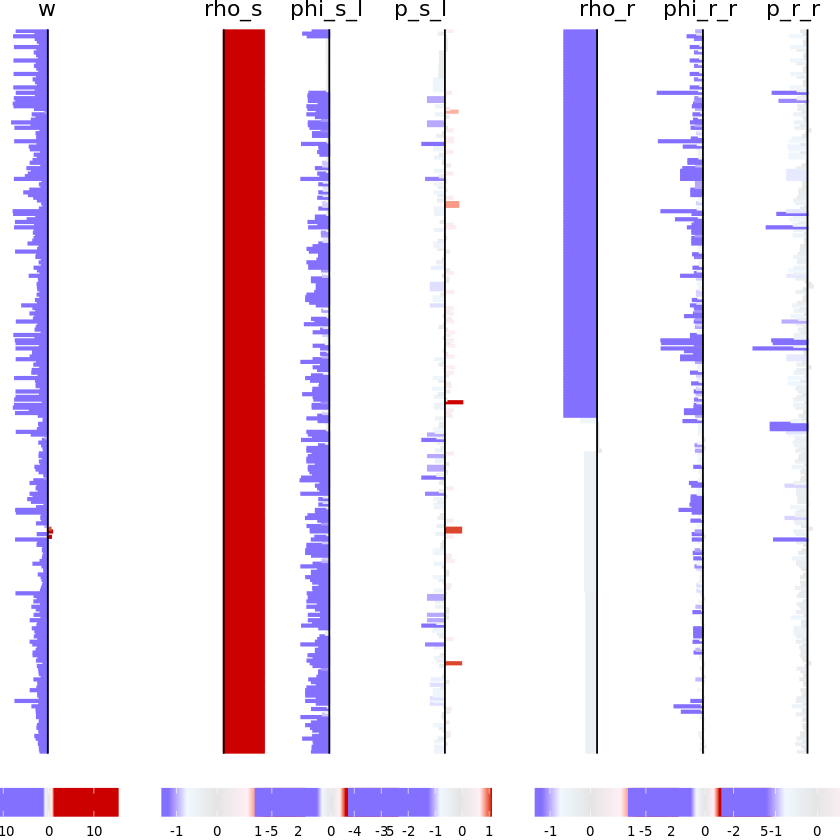

[1] "Total number of interactions across all sending cell types: 2458"


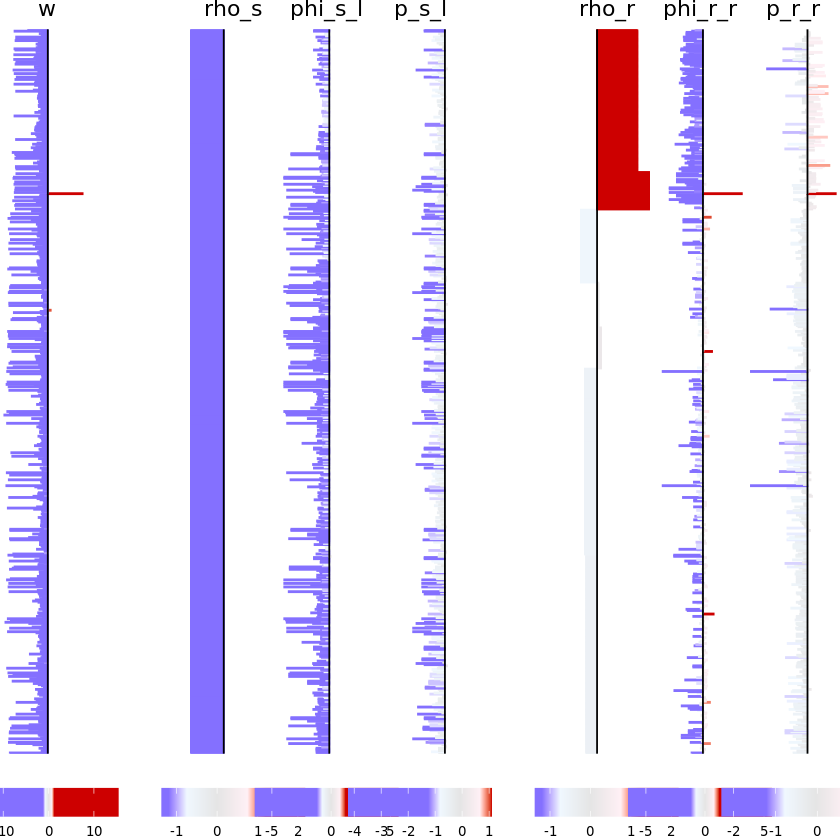

In [14]:
sending_cell_types <- unique(interactions$anno_interactions$sending_cell_type)

# Initialize the counter
total_interaction_count_sending <- 0

for(cell_type in sending_cell_types) {
    my_anno_interactions <- interactions$anno_interactions[interactions$anno_interactions$sending_cell_type == cell_type & interactions$anno_interactions$receiving_cell_type != cell_type & interactions$anno_interactions$interaction_ID %in% IDs, ]
    
    interaction_count <- nrow(my_anno_interactions)
    
    if(interaction_count > 0) {
        my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID, ordered = TRUE)
        
        # Add the interaction count for this cell type to the total counter
        total_interaction_count_sending <- total_interaction_count_sending + interaction_count
        
        print(paste("Cell Type:", cell_type, "- Number of interactions:", interaction_count))
            
        # Plotting for the current cell_type
        plot_all_forests(my_idx = rep(TRUE, interaction_count),
                         my_anno_interactions = my_anno_interactions,
                         keep_order = TRUE,
                         threshold = 1,
                         legend_title_size = 0,
                         legend_text_size = 8, component_lim = component_lim
                        )
    }
}

# Print the total sum of the count of all interactions at the end
print(paste("Total number of interactions across all sending cell types:", total_interaction_count_sending))

[1] "Cell Type: Mono - Number of interactions: 410"
[1] "Cell Type: Gran - Number of interactions: 482"


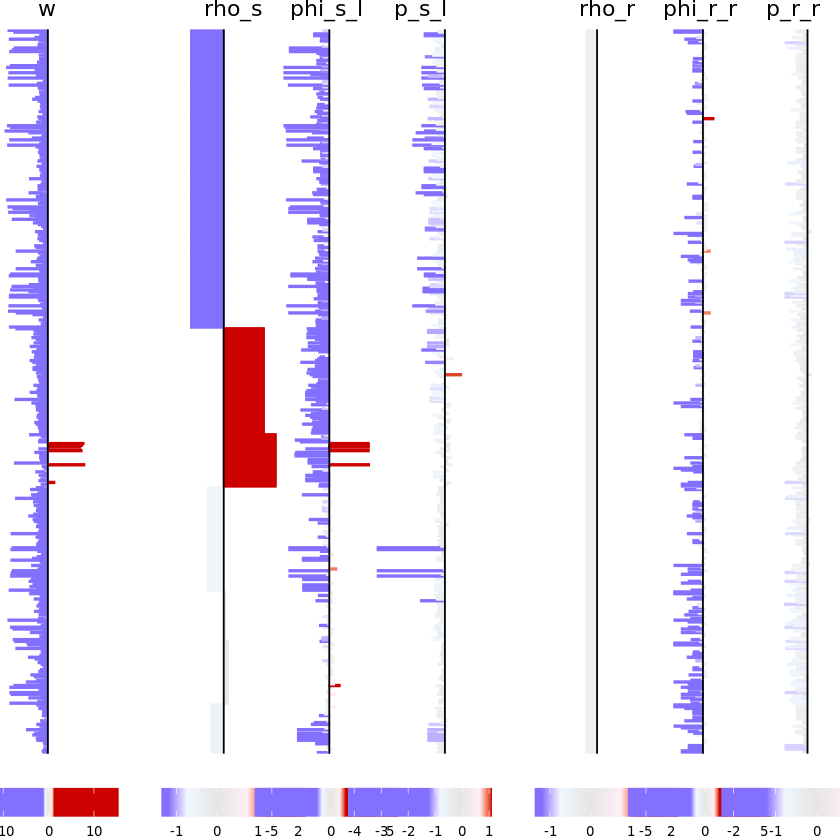

[1] "Cell Type: T - Number of interactions: 132"


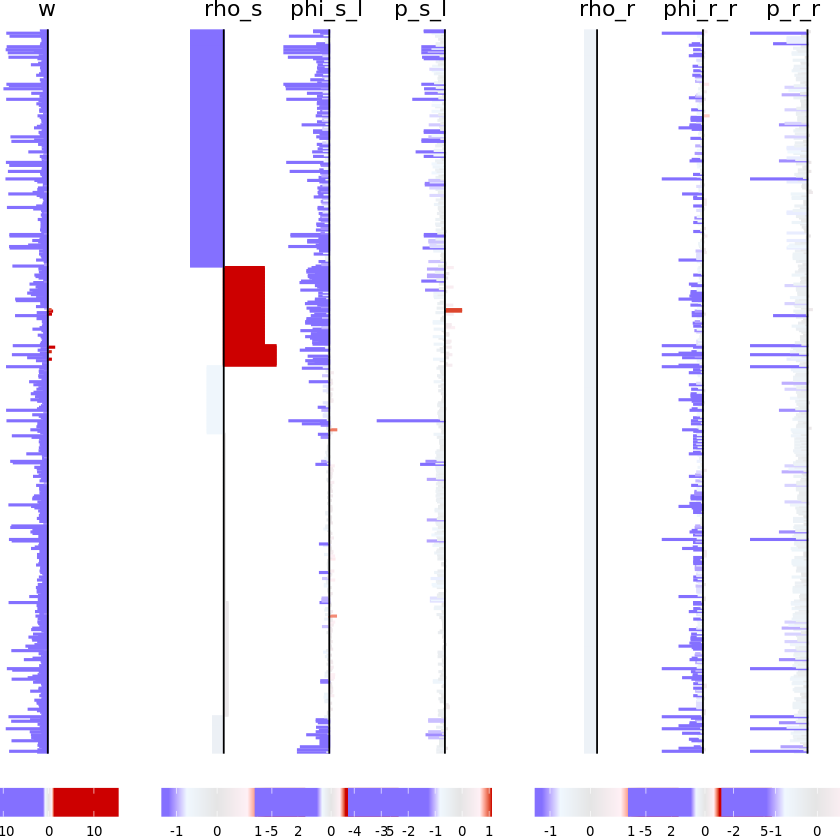

[1] "Cell Type: NK - Number of interactions: 149"


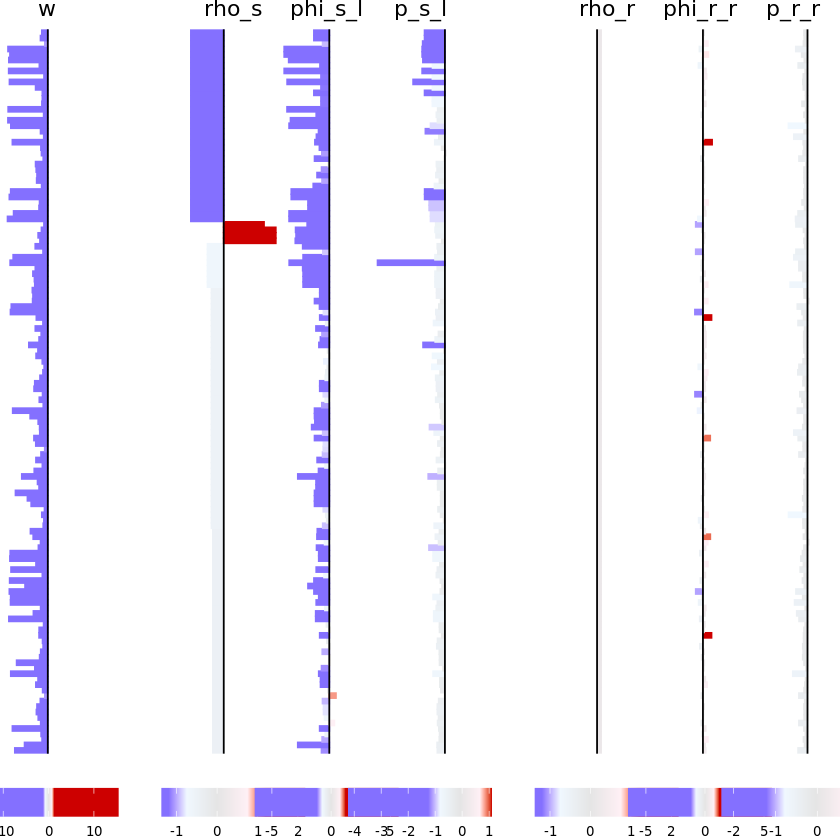

[1] "Cell Type: B - Number of interactions: 164"


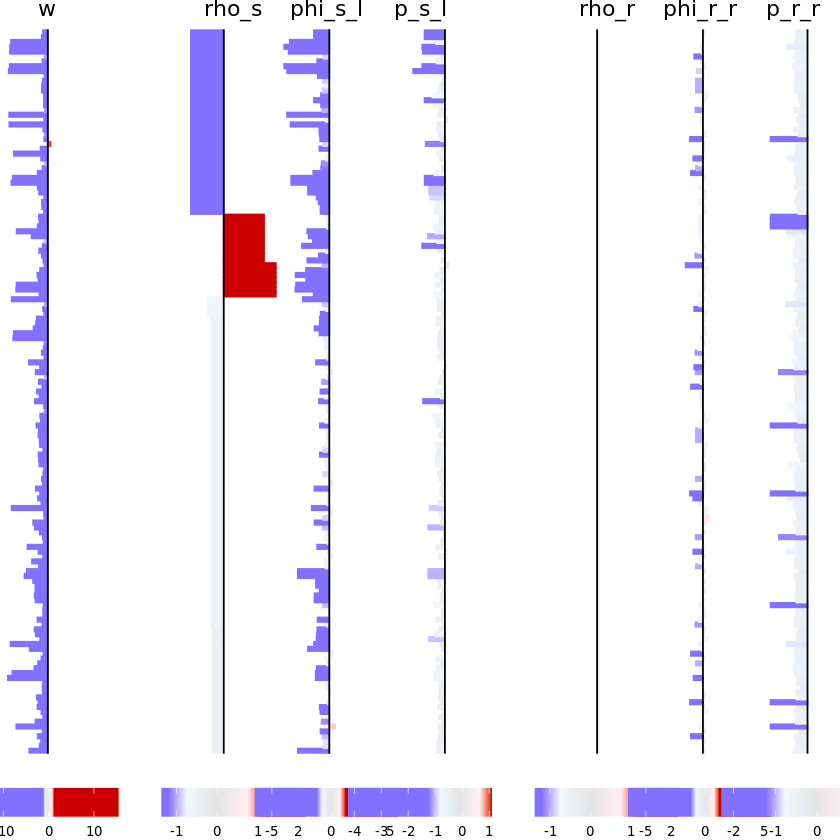

[1] "Cell Type: HSPC - Number of interactions: 123"


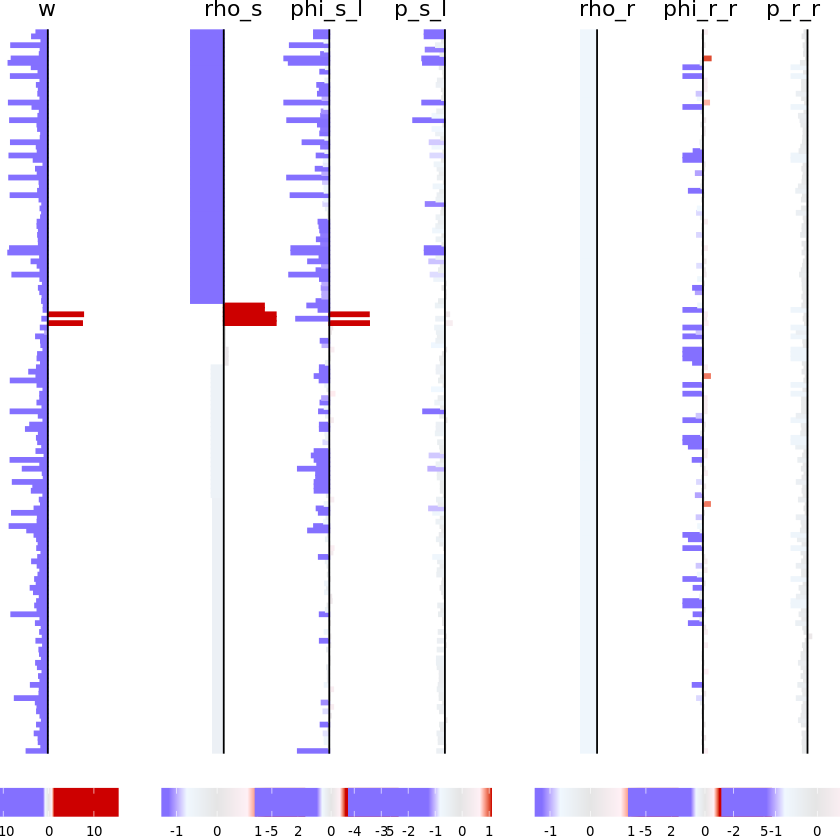

[1] "Cell Type: Ery - Number of interactions: 218"


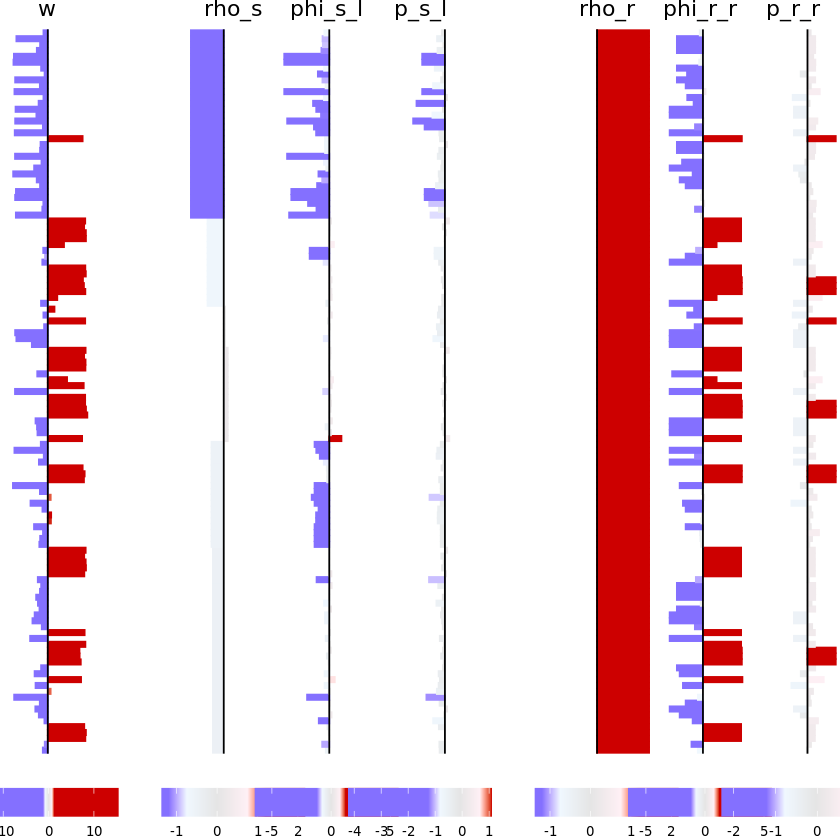

[1] "Cell Type: DC - Number of interactions: 780"


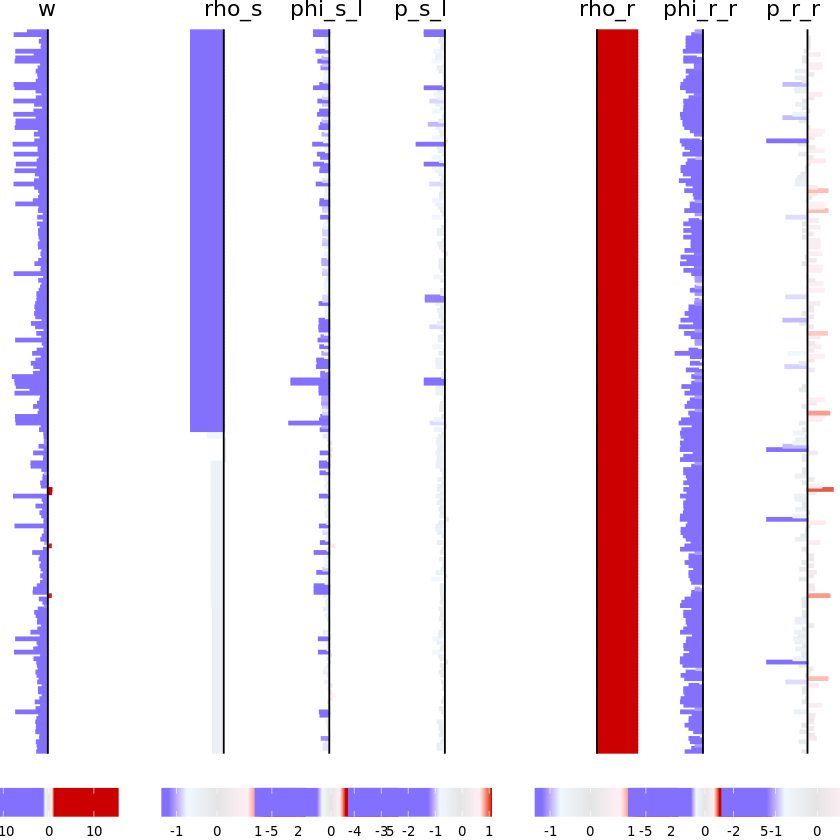

[1] "Total number of interactions across all receiving cell types: 2458"


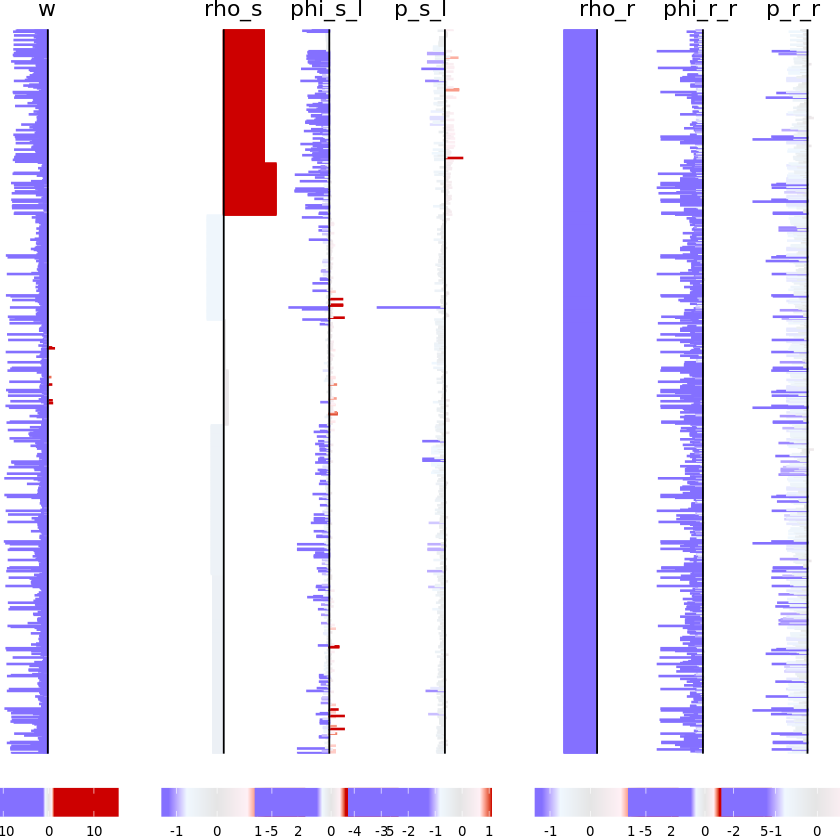

In [15]:
receiving_cell_types <- unique(interactions$anno_interactions$receiving_cell_type)

# Initialize the counter
total_interaction_count <- 0

for(cell_type in receiving_cell_types) {
    my_anno_interactions <- interactions$anno_interactions[interactions$anno_interactions$receiving_cell_type == cell_type & interactions$anno_interactions$sending_cell_type != cell_type & interactions$anno_interactions$interaction_ID %in% IDs, ]
    
    interaction_count <- nrow(my_anno_interactions)
    
    if(interaction_count > 0) {
        my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID, ordered = TRUE)
        
        # Add the interaction count for this cell type to the total counter
        total_interaction_count <- total_interaction_count + interaction_count
        
        print(paste("Cell Type:", cell_type, "- Number of interactions:", interaction_count))
            
        # Plotting for the current cell_type
        plot_all_forests(my_idx = rep(TRUE, interaction_count),
                         my_anno_interactions = my_anno_interactions,
                         keep_order = TRUE,
                         threshold = 1,
                         legend_title_size = 0,
                         legend_text_size = 8, component_lim = component_lim
                        )
    }
}

# Print the total sum of the count of all interactions at the end
print(paste("Total number of interactions across all receiving cell types:", total_interaction_count))

[1] "Cell Type: Mono - Number of interactions: 31"
[1] "Cell Type: Gran - Number of interactions: 20"


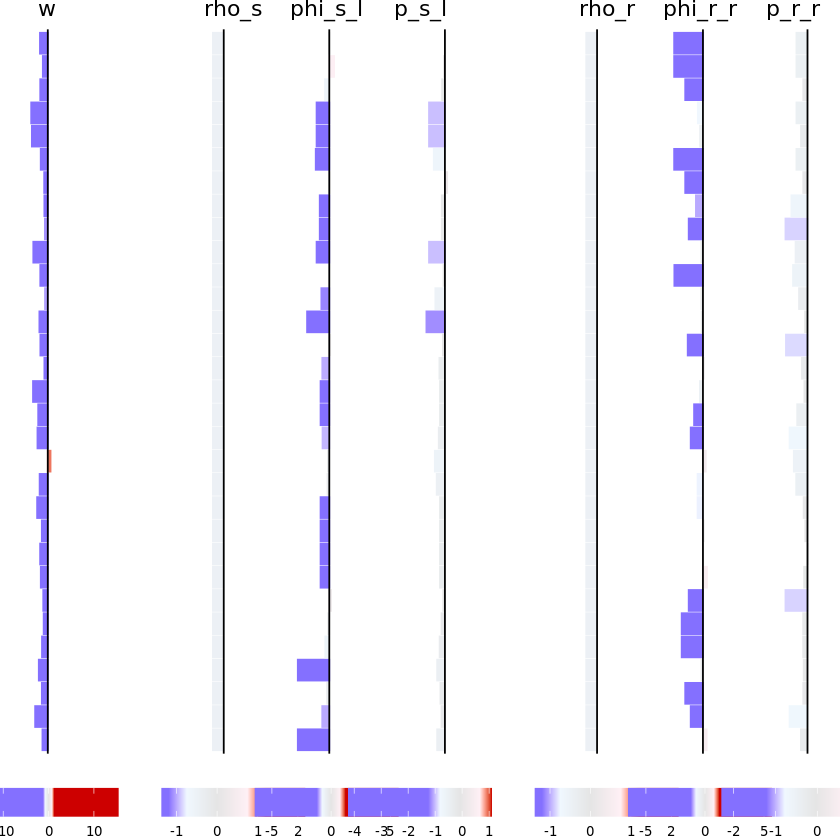

[1] "Cell Type: B - Number of interactions: 2"


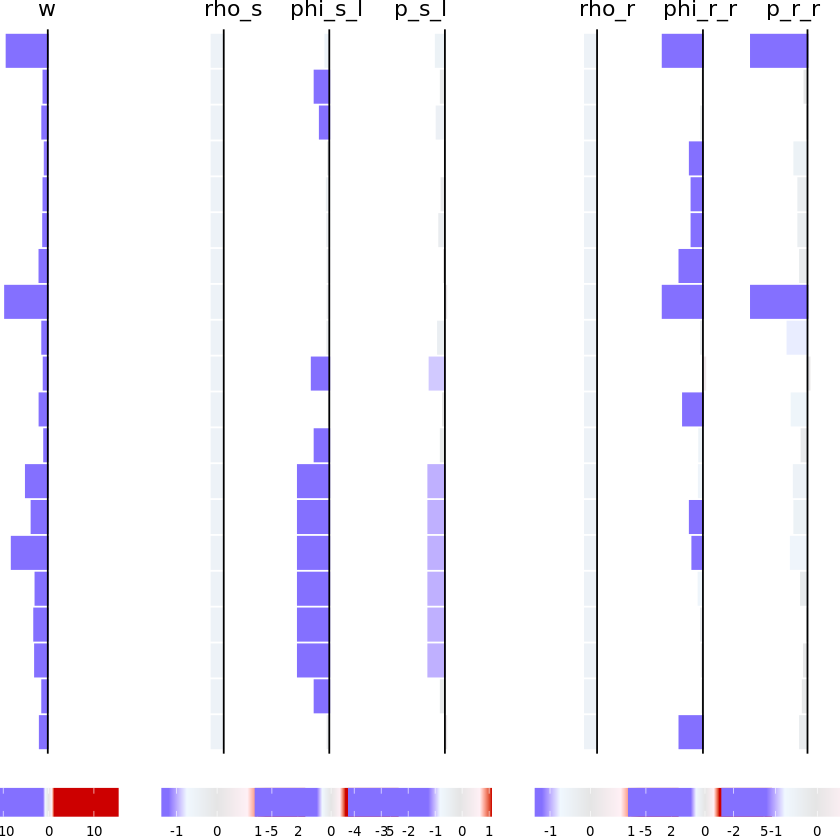

[1] "Cell Type: HSPC - Number of interactions: 36"


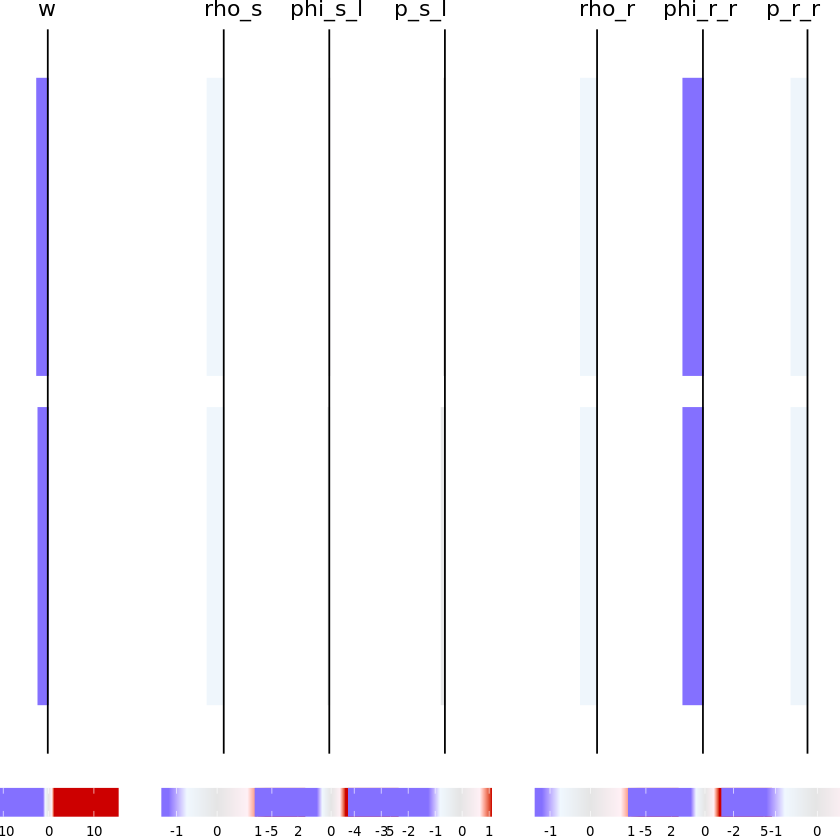

[1] "Cell Type: DC - Number of interactions: 117"


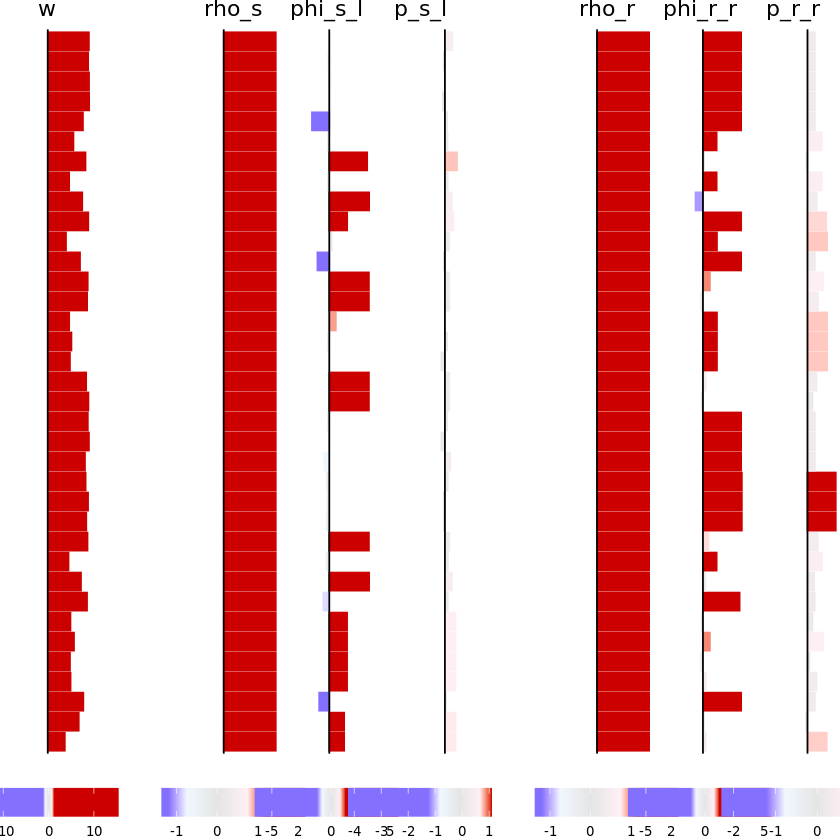

[1] "Total number of interactions for cell types acting both as sending and receiving: 206"


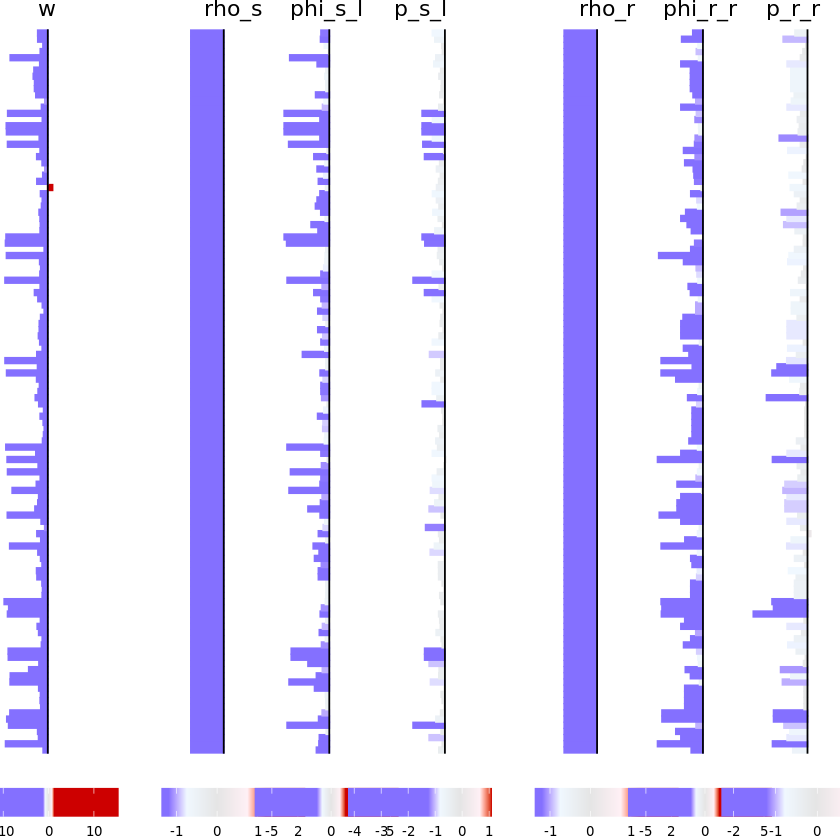

In [16]:
both_cell_types <- unique(interactions$anno_interactions$receiving_cell_type)

# Initialize the counter
total_interaction_count_both <- 0

for(cell_type in both_cell_types) {
    my_anno_interactions <- interactions$anno_interactions[interactions$anno_interactions$receiving_cell_type == cell_type & interactions$anno_interactions$sending_cell_type == cell_type  & interactions$anno_interactions$interaction_ID %in% IDs, ]
    
    interaction_count <- nrow(my_anno_interactions)
    
    if(interaction_count > 0) {
        my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID, ordered = TRUE)
        
        # Add the interaction count for this cell type to the total counter
        total_interaction_count_both <- total_interaction_count_both + interaction_count
        
        print(paste("Cell Type:", cell_type, "- Number of interactions:", interaction_count))
            
        # Plotting for the current cell_type
        plot_all_forests(my_idx = rep(TRUE, interaction_count),
                         my_anno_interactions = my_anno_interactions,
                         keep_order = TRUE,
                         threshold = 1,
                         legend_title_size = 0,
                         legend_text_size = 8, component_lim = component_lim
                        )
    }
}

# Print the total sum of the count of all interactions at the end
print(paste("Total number of interactions for cell types acting both as sending and receiving:", total_interaction_count_both))